In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Sneha/archive (3)/PlantVillage",
    shuffle = True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 1 2 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 2 0 0 1 1 1 0]


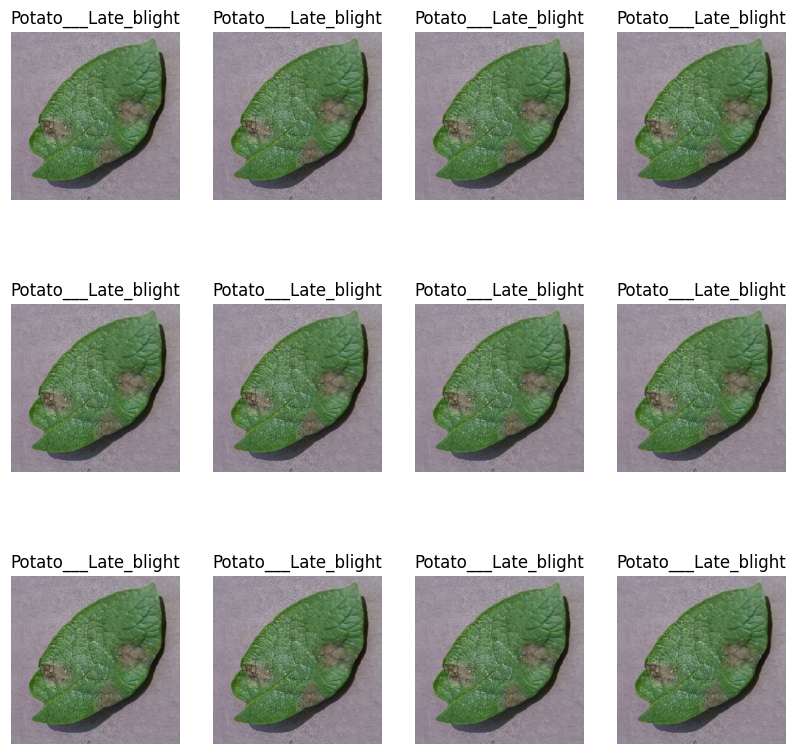

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
    


In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(dataset)

68

In [17]:
len(train_ds)

54

In [18]:
len(test_ds)

8

In [19]:
len(val_ds)

6

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

IMAGE_SIZE = 224 

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [23]:
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Users\Sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 757ms/step - accuracy: 0.4269 - loss: 0.9426 - val_accuracy: 0.6198 - val_loss: 0.8346
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 695ms/step - accuracy: 0.6621 - loss: 0.6910 - val_accuracy: 0.7656 - val_loss: 0.5925
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 636ms/step - accuracy: 0.7928 - loss: 0.4679 - val_accuracy: 0.8438 - val_loss: 0.4225
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 0.8700 - loss: 0.3250 - val_accuracy: 0.8542 - val_loss: 0.3360
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 647ms/step - accuracy: 0.8921 - loss: 0.2607 - val_accuracy: 0.8906 - val_loss: 0.2782
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9096 - loss: 0.2135 - val_accuracy: 0.9062 - val_loss: 0.2110
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 666ms/step - accuracy: 0.9281 - loss: 0.1785 - val_accuracy: 0.9271 - val_loss: 0.1987
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 636ms/step - accuracy: 0.9328 - loss: 0.1541 - val_accura

In [27]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.9643 - loss: 0.1237


In [28]:
scores

[0.16491079330444336, 0.94140625]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history.history["accuracy"]

[0.47974535822868347,
 0.7135416865348816,
 0.8148148059844971,
 0.8709490895271301,
 0.8946759104728699,
 0.9056712985038757,
 0.9236111044883728,
 0.9369212985038757,
 0.9537037014961243,
 0.9479166865348816]

In [33]:
len(history.history["accuracy"])

10

In [35]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss= history.history["loss"]
val_loss = history.history['val_loss']

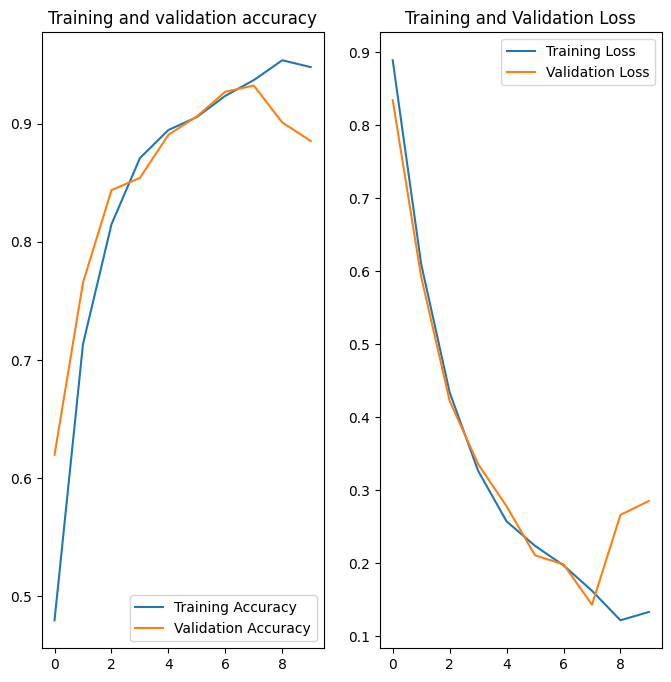

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc= 'lower right')
plt.title("Training and validation accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0])

tf.Tensor(
[[[123. 120. 131.]
  [130. 127. 138.]
  [126. 123. 134.]
  ...
  [160. 162. 174.]
  [161. 163. 175.]
  [153. 155. 167.]]

 [[101.  98. 109.]
  [111. 108. 119.]
  [143. 140. 151.]
  ...
  [150. 152. 164.]
  [155. 157. 169.]
  [152. 154. 166.]]

 [[114. 111. 122.]
  [121. 118. 129.]
  [106. 103. 114.]
  ...
  [152. 154. 167.]
  [161. 163. 176.]
  [162. 164. 177.]]

 ...

 [[115. 111. 125.]
  [112. 108. 122.]
  [110. 106. 120.]
  ...
  [144. 142. 156.]
  [143. 141. 155.]
  [170. 168. 182.]]

 [[122. 118. 132.]
  [117. 113. 127.]
  [113. 109. 123.]
  ...
  [133. 131. 145.]
  [153. 151. 165.]
  [173. 171. 185.]]

 [[133. 129. 143.]
  [127. 123. 137.]
  [120. 116. 130.]
  ...
  [118. 116. 130.]
  [146. 144. 158.]
  [157. 155. 169.]]], shape=(256, 256, 3), dtype=float32)


In [39]:
# converting tensor to numpy

for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy())

[[[159. 153. 163.]
  [162. 156. 166.]
  [166. 160. 170.]
  ...
  [103.  96. 103.]
  [129. 122. 129.]
  [102.  95. 102.]]

 [[166. 160. 170.]
  [168. 162. 172.]
  [171. 165. 175.]
  ...
  [132. 125. 132.]
  [127. 120. 127.]
  [144. 137. 144.]]

 [[167. 161. 171.]
  [169. 163. 173.]
  [171. 165. 175.]
  ...
  [106.  99. 106.]
  [110. 103. 110.]
  [130. 123. 130.]]

 ...

 [[164. 157. 164.]
  [164. 157. 164.]
  [164. 157. 164.]
  ...
  [ 98.  88.  96.]
  [104.  94. 102.]
  [103.  93. 101.]]

 [[163. 156. 163.]
  [163. 156. 163.]
  [164. 157. 164.]
  ...
  [ 87.  77.  85.]
  [ 79.  69.  77.]
  [ 88.  78.  86.]]

 [[162. 155. 162.]
  [163. 156. 163.]
  [164. 157. 164.]
  ...
  [107.  97. 105.]
  [ 99.  89.  97.]
  [103.  93. 101.]]]


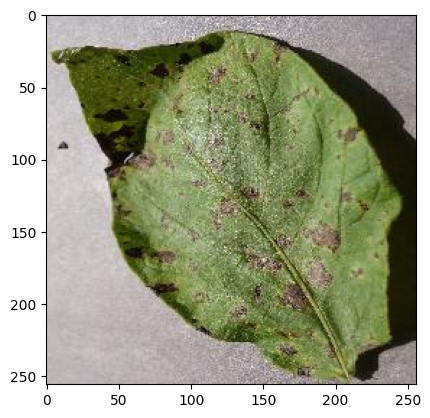

In [40]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [49]:
import numpy as np
np.argmax([0.00726892, 0.9646171, 0.02811404])


np.int64(1)

first image to predict
actual_label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
[0.00726892 0.9646171  0.02811404]
1
predicted_label: Potato___Late_blight


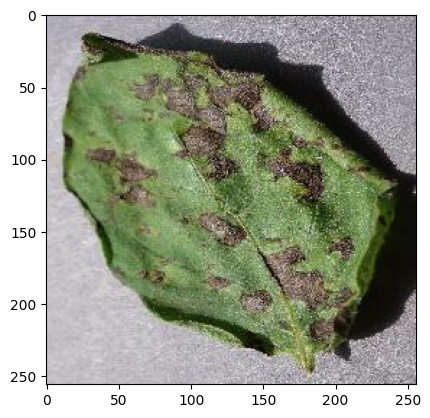

In [52]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual_label:", class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print(batch_prediction[0])
  print(np.argmax(batch_prediction[0]))
  print("predicted_label:",class_names[np.argmax(batch_prediction[0])])

In [66]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions  = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


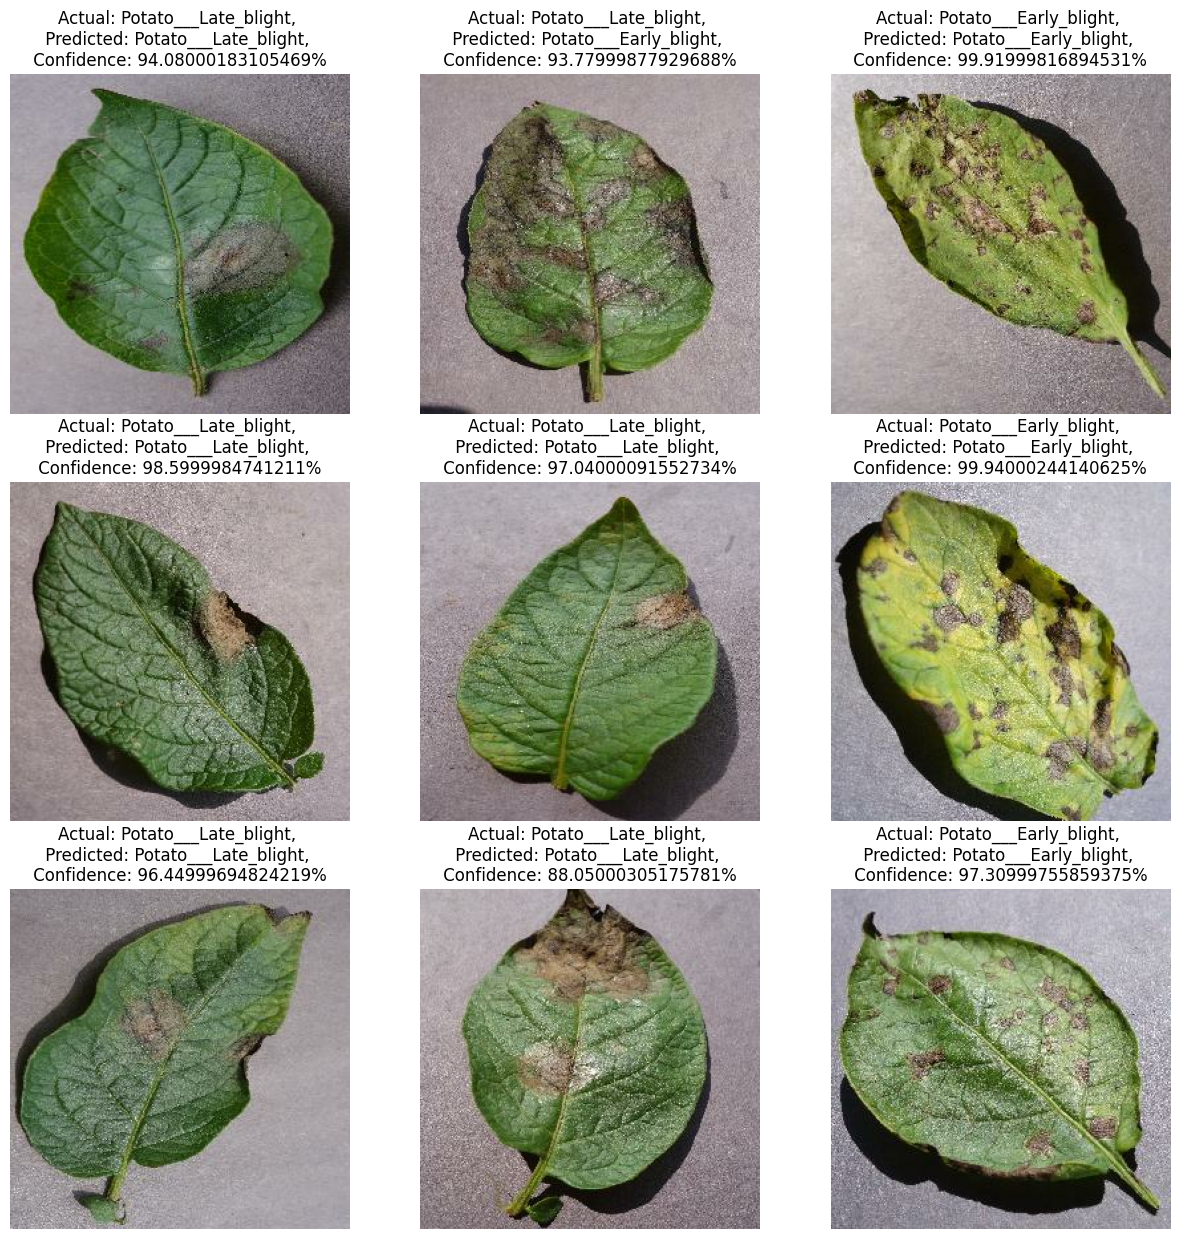

In [71]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: { actual_class}, \n Predicted: {predicted_class},  \n Confidence: {confidence}% ")
        plt.axis("off")

In [73]:
# model_version=1
# model.save(f"../models{model_version}")
